<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/DroughtPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/ERA5_COMBINED/201505-202309.csv")
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_am,soil_moisture_pm,soil_moisture_am_anomaly,soil_moisture_pm_anomaly,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03
0,0,201505,9.208,37.505,292.818,283.608,305.405,286.220,0.021006,0.000000,...,0.179231,0.164235,NaN,NaN,4797.35,2689.45,295.875,0.000001,-0.833514,-0.913074
1,1,201505,9.657,37.505,292.839,283.988,305.404,286.520,0.020244,0.000000,...,0.178913,0.161112,NaN,NaN,4676.50,2863.50,295.602,0.000002,-0.970380,-0.844767
2,2,201505,3.369,37.056,292.296,284.591,306.343,286.849,0.011030,0.000000,...,0.097784,0.088205,NaN,NaN,4307.48,2740.11,295.231,0.000012,-1.704530,-1.869160
3,3,201505,3.818,37.056,292.105,284.314,306.379,286.606,0.012269,0.000000,...,0.119543,0.105292,NaN,NaN,4247.37,2708.59,295.290,0.000013,-1.726370,-1.874620
4,4,201505,4.267,37.056,291.855,283.943,306.398,286.190,0.018120,0.000000,...,0.153508,0.128331,NaN,NaN,4154.62,2681.86,295.341,0.000012,-1.751720,-1.920560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352991,13391,202309,19.988,-35.259,287.069,279.898,294.821,281.649,0.094790,0.000000,...,0.187951,0.213317,0.024678,0.025565,6111.18,3565.15,289.527,NaN,2.932740,1.531950
1352992,13392,202309,37.505,-46.937,277.159,273.141,282.514,274.021,0.100942,0.000121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352993,13393,202309,37.954,-46.937,277.159,273.141,282.514,274.021,0.100942,0.000121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352994,13394,202309,37.505,-47.386,277.159,273.141,282.514,274.021,0.100942,0.000121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.describe()

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_am,soil_moisture_pm,soil_moisture_am_anomaly,soil_moisture_pm_anomaly,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03
count,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,1.352996e+06,...,1.345872e+06,1.346038e+06,1.217163e+06,1.219035e+06,1.349670e+06,1.349670e+06,1.350269e+06,1.348653e+06,1.350177e+06,1.350292e+06
mean,6.697500e+03,2.019105e+05,1.825826e+01,6.108191e+00,2.976904e+02,2.888097e+02,3.073844e+02,2.836715e+02,5.366456e-02,5.600628e-05,...,1.529533e-01,1.460223e-01,-1.352636e-03,-1.248988e-03,3.424513e+03,2.135775e+03,2.985856e+02,2.596017e-05,-6.535210e-01,-7.703915e-01
std,3.867094e+03,2.448672e+02,1.599541e+01,1.774464e+01,5.728601e+00,6.659536e+00,5.735195e+00,8.840898e+00,9.017791e-02,2.439198e-04,...,1.288739e-01,1.168588e-01,2.309979e-02,2.247615e-02,2.354571e+03,1.415600e+03,5.653897e+00,4.225233e-05,1.348428e+00,1.289709e+00
min,0.000000e+00,2.015050e+05,-2.582700e+01,-4.738600e+01,2.707980e+02,2.563230e+02,2.805750e+02,2.565430e+02,1.627390e-05,0.000000e+00,...,2.000000e-02,2.000280e-02,-2.646520e-01,-2.667740e-01,-8.812710e+02,-1.516340e+02,2.777050e+02,0.000000e+00,-5.000000e+00,-5.000000e+00
25%,3.348750e+03,2.017060e+05,6.962000e+00,-7.411000e+00,2.944630e+02,2.846860e+02,3.035020e+02,2.762470e+02,2.276710e-04,0.000000e+00,...,5.053618e-02,5.634820e-02,-8.553455e-03,-7.791780e-03,1.125050e+03,8.495540e+02,2.955910e+02,5.545890e-08,-1.505230e+00,-1.614060e+00
50%,6.697500e+03,2.019070e+05,1.998800e+01,9.208000e+00,2.981460e+02,2.904290e+02,3.070680e+02,2.843580e+02,6.324845e-03,0.000000e+00,...,1.058500e-01,9.840695e-02,-8.995750e-04,-8.256030e-04,2.818600e+03,1.681870e+03,2.990610e+02,3.657270e-06,-6.762560e-01,-8.521145e-01
75%,1.004625e+04,2.021080e+05,3.031800e+01,2.043700e+01,3.012860e+02,2.939900e+02,3.116390e+02,2.918040e+02,7.555740e-02,1.069570e-06,...,2.222810e-01,2.104940e-01,4.872545e-03,4.924605e-03,5.494120e+03,3.268957e+03,3.022190e+02,3.589990e-05,2.429010e-01,6.848940e-02
max,1.339500e+04,2.023090e+05,5.142900e+01,3.750500e+01,3.139530e+02,3.039010e+02,3.231840e+02,3.005000e+02,1.790260e+00,1.399220e-02,...,6.888350e-01,6.773250e-01,2.306410e-01,2.661300e-01,9.259810e+03,6.461520e+03,3.141030e+02,3.989610e-04,5.000000e+00,5.000000e+00


In [5]:
dataset.isna().sum()

Unnamed: 0                              0
Month                                   0
Lat                                     0
Lon                                     0
temperature_2m                          0
temperature_2m_min                      0
temperature_2m_max                      0
dewpoint_temperature_2m                 0
total_precipitation_sum                 0
total_precipitation_min                 0
total_precipitation_max                 0
u_component_of_wind_10m                 0
v_component_of_wind_10m                 0
surface_net_solar_radiation_sum         0
total_evaporation_sum                   0
soil_moisture_am                     7124
soil_moisture_pm                     6958
soil_moisture_am_anomaly           135833
soil_moisture_pm_anomaly           133961
NDVI                                 3326
EVI                                  3326
next_month_tempreature               2727
next_month_precipitation             4343
spei01                            

In [6]:
dataset = dataset.drop(["soil_moisture_am_anomaly", "soil_moisture_pm_anomaly"], axis = 1)

In [7]:
dataset.dropna(subset=['spei01', 'spei03', 'next_month_precipitation', 'next_month_tempreature', 'EVI', 'NDVI', "soil_moisture_am", "soil_moisture_pm"], inplace=True)

In [8]:
dataset.isna().sum()

Unnamed: 0                         0
Month                              0
Lat                                0
Lon                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
dtype: int64

In [9]:
len(dataset)

1343574

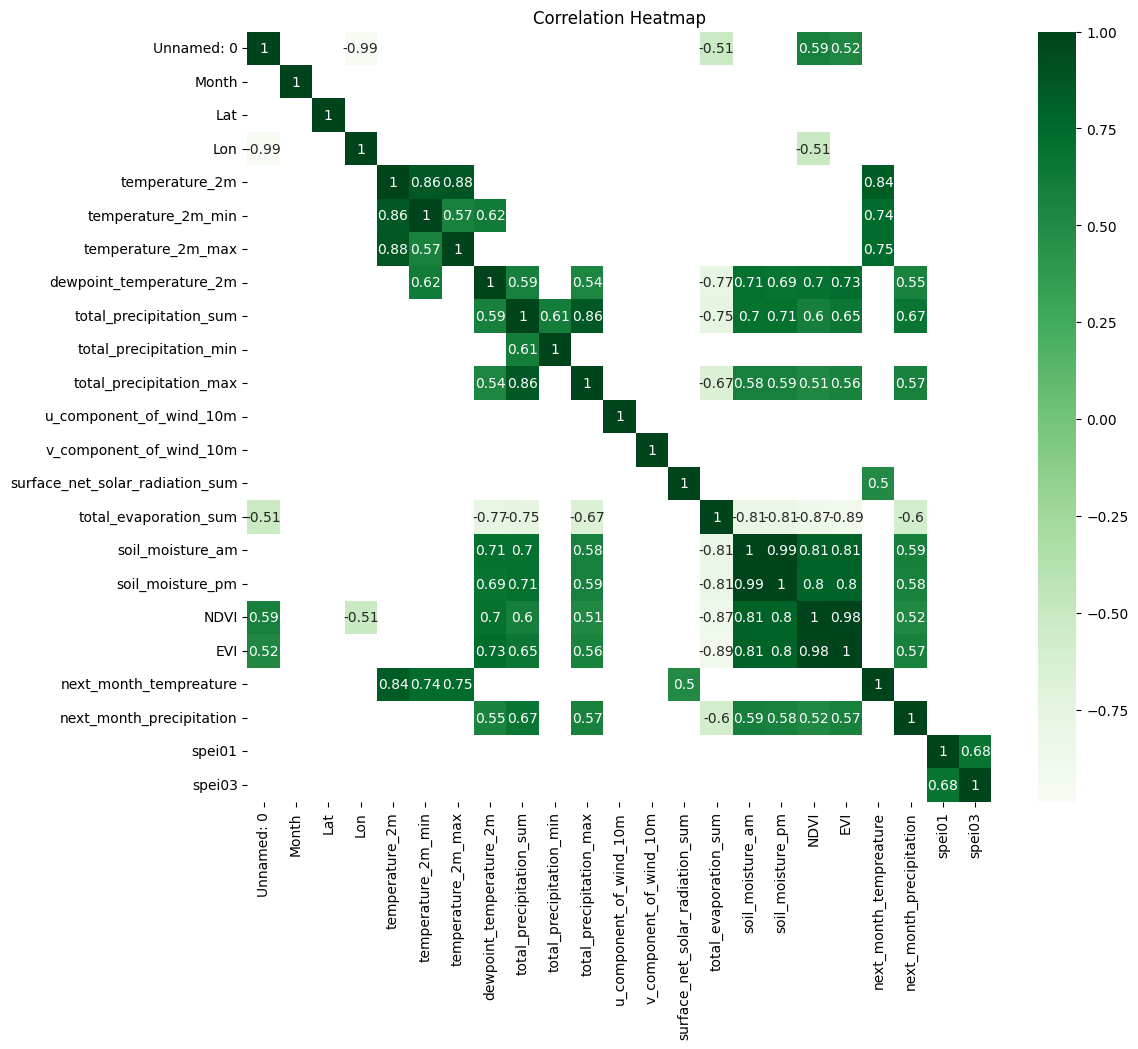

In [10]:
correlation_matrix = dataset.corr()

filtered_correlations = correlation_matrix[(correlation_matrix <= -0.5) | (correlation_matrix >= 0.5)]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlations, annot=True, cmap='Greens', center=0)
plt.title("Correlation Heatmap")
plt.show()

- Longitude is moderately inversely correlated to NDVI
- Average temperature this month is strongly correlated to average temperature the following month
- Average temperature is strongly correlated to minimum and maximum temperature
- Dewpoint temperature is strongly correlated with NDVI, EVI, and soil moisture. It is moderately correlated with next month precipitation, past month precipitation, and past month temperature
- Total past month precipitation is strongly correlated with soil moisture, maximum precipitation, and dewpoint temperature
- NDVI and EVI are strongly correlated with soil moisture


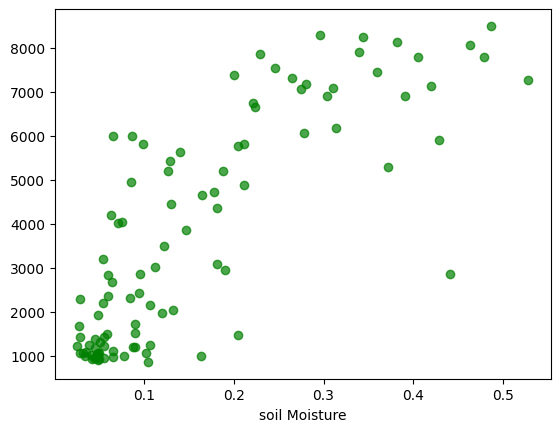

In [19]:
import random

sample_df = dataset.sample(n=100, axis='rows')

soil_moisture = sample_df["soil_moisture_am"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(soil_moisture, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("soil Moisture")

plt.show()

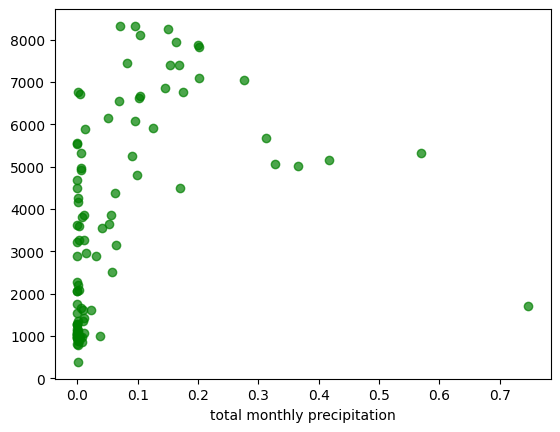

In [20]:
sample_df = dataset.sample(n=100, axis='rows')

total_precipitation_sample = sample_df["total_precipitation_sum"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(total_precipitation_sample, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("total monthly precipitation")

plt.show()

<ipython-input-11-d8f96d5f0668>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


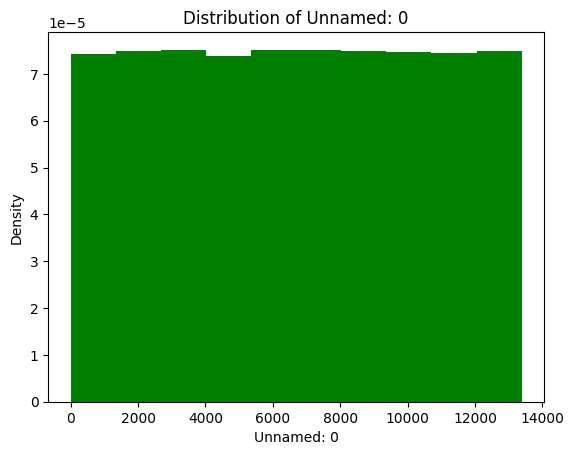

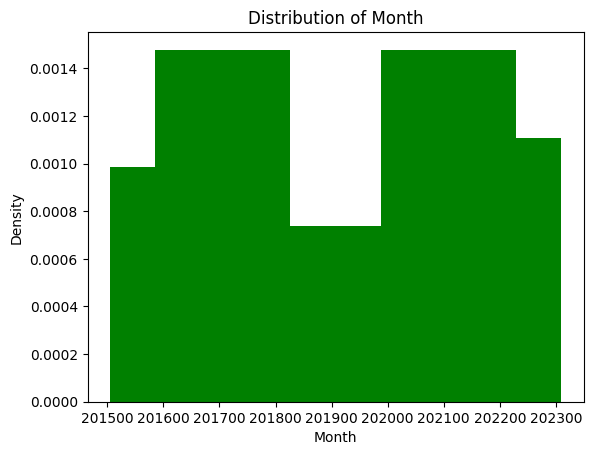

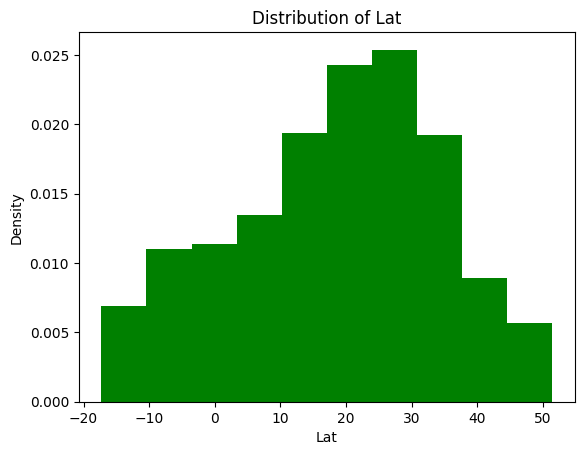

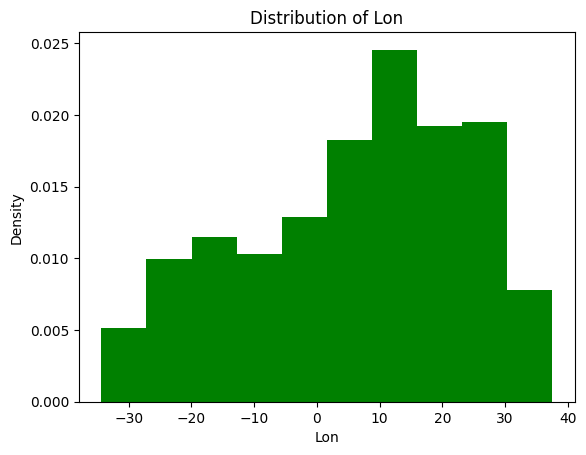

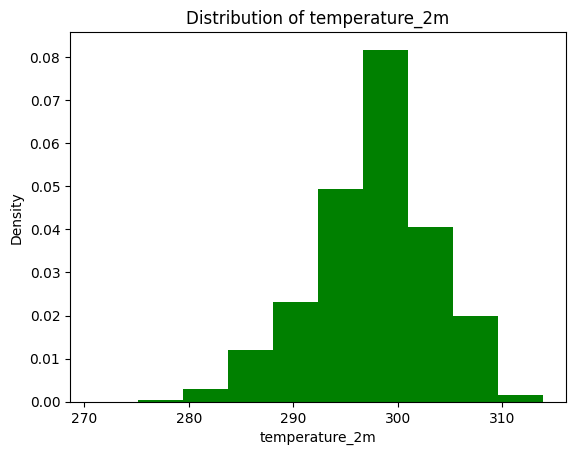

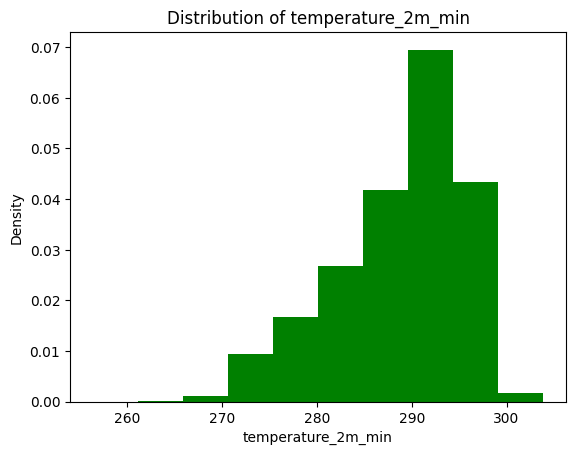

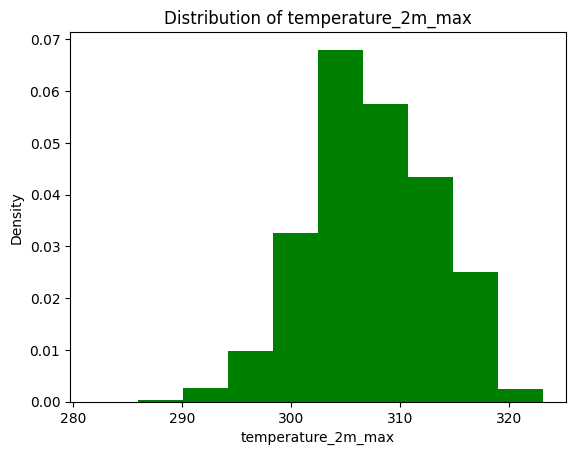

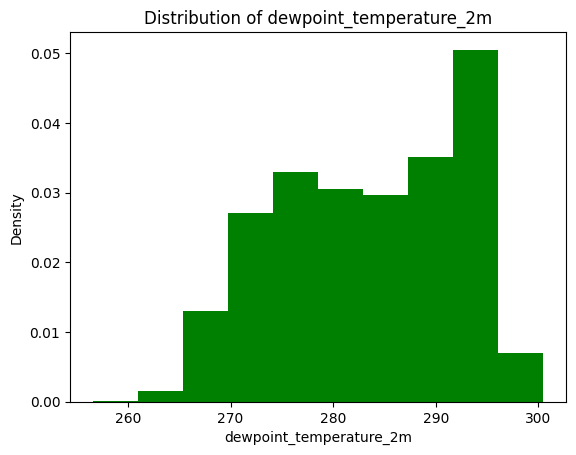

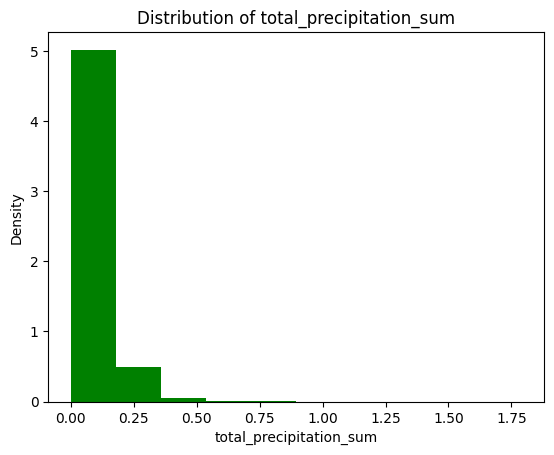

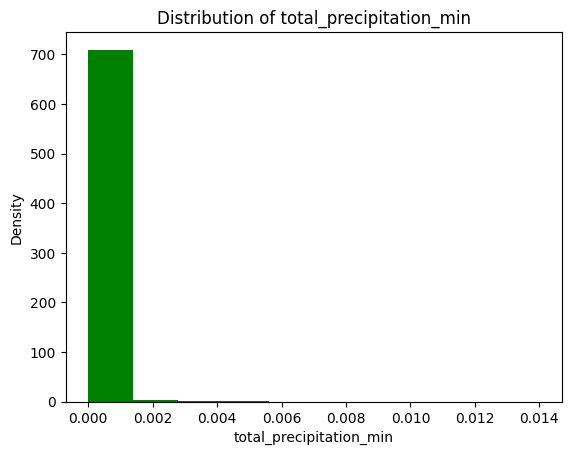

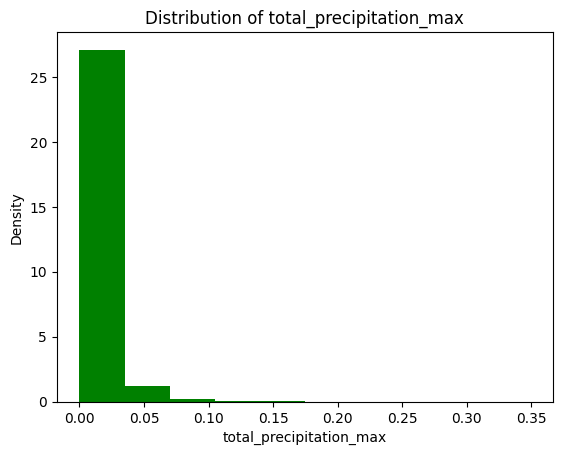

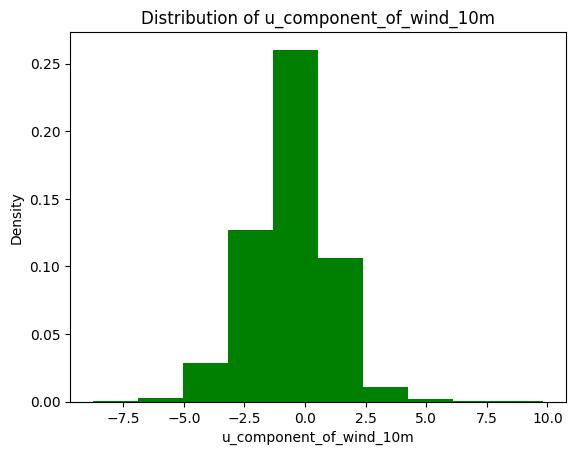

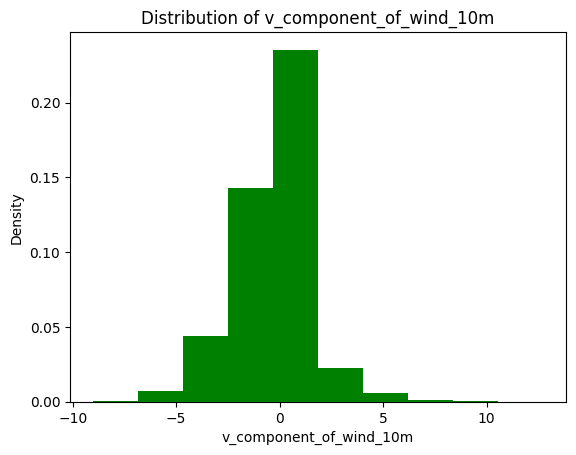

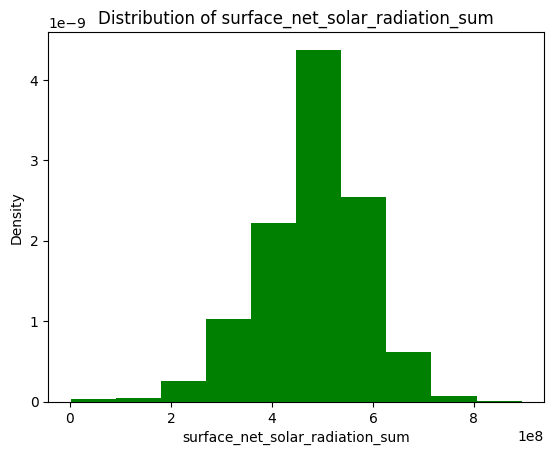

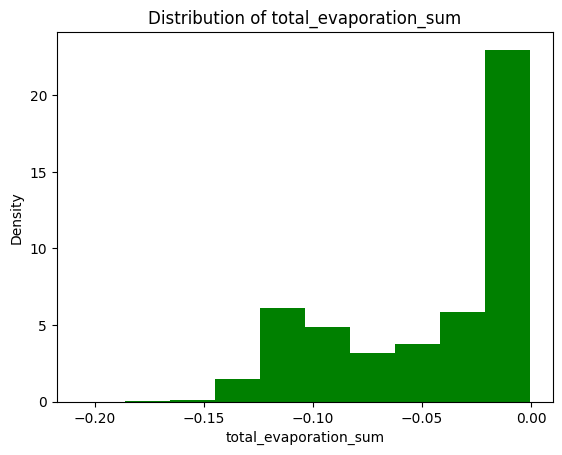

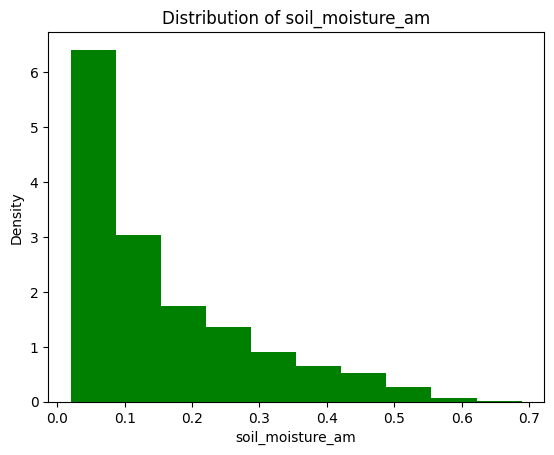

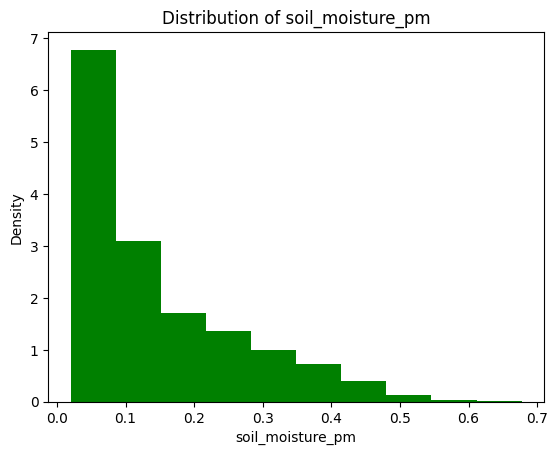

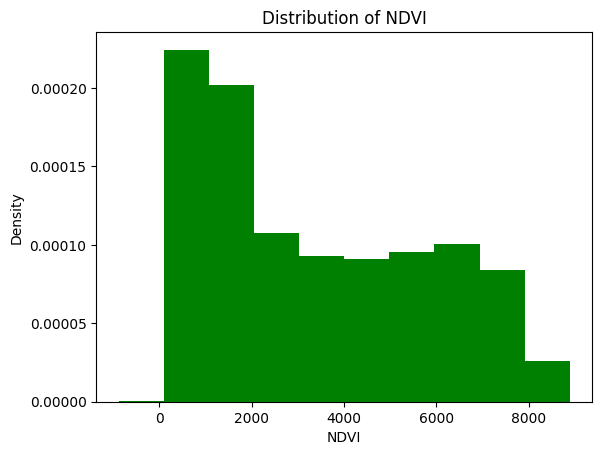

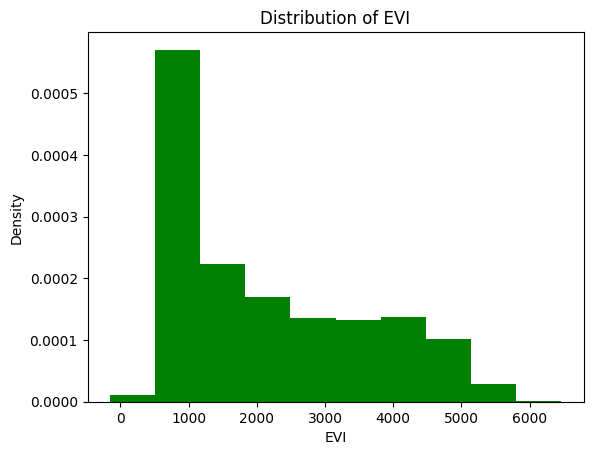

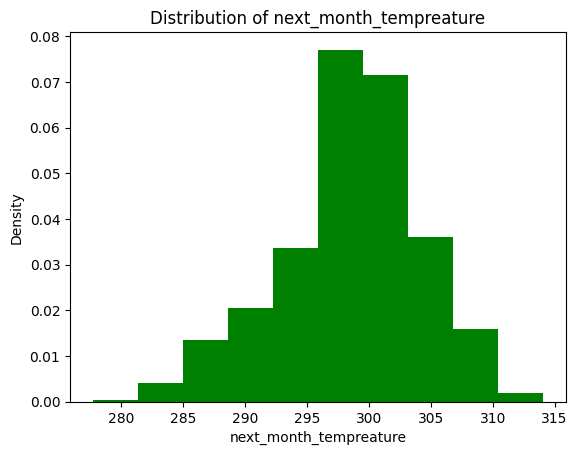

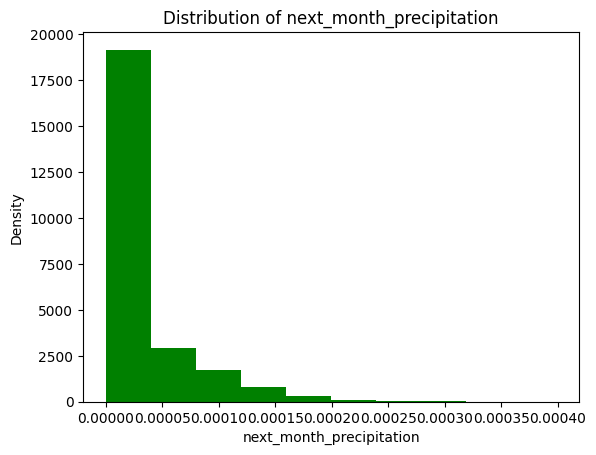

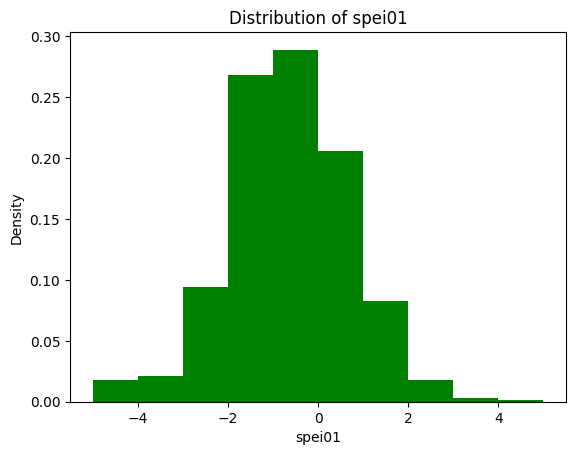

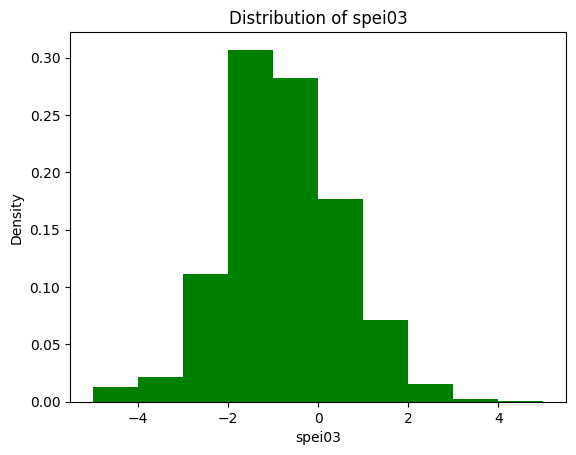

In [11]:
column_list = dataset.columns.values.tolist()

for col_name in column_list:
    plt.figure()
    plt.hist(dataset[col_name], density = True, color = 'green')
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

In [16]:
dataset['datetime'] = pd.to_datetime(dataset['Month'], format='%Y%m')

In [17]:
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,total_evaporation_sum,soil_moisture_am,soil_moisture_pm,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime
0,0,201505,9.208,37.505,292.818,283.608,305.405,286.220,0.021006,0.0,...,-0.125420,0.179231,0.164235,4797.35,2689.45,295.875,0.000001,-0.833514,-0.913074,2015-05-01
1,1,201505,9.657,37.505,292.839,283.988,305.404,286.520,0.020244,0.0,...,-0.086211,0.178913,0.161112,4676.50,2863.50,295.602,0.000002,-0.970380,-0.844767,2015-05-01
2,2,201505,3.369,37.056,292.296,284.591,306.343,286.849,0.011030,0.0,...,-0.075463,0.097784,0.088205,4307.48,2740.11,295.231,0.000012,-1.704530,-1.869160,2015-05-01
3,3,201505,3.818,37.056,292.105,284.314,306.379,286.606,0.012269,0.0,...,-0.076520,0.119543,0.105292,4247.37,2708.59,295.290,0.000013,-1.726370,-1.874620,2015-05-01
4,4,201505,4.267,37.056,291.855,283.943,306.398,286.190,0.018120,0.0,...,-0.085176,0.153508,0.128331,4154.62,2681.86,295.341,0.000012,-1.751720,-1.920560,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352979,13379,202309,24.928,-34.361,287.841,281.930,301.169,282.571,0.095630,0.0,...,-0.062877,0.169733,0.208410,4473.81,2216.74,291.103,0.000010,1.435310,1.129540,2023-09-01
1352980,13380,202309,25.377,-34.361,288.416,282.802,300.051,282.891,0.088558,0.0,...,-0.070101,0.166631,0.180785,5536.07,2784.92,291.476,0.000009,1.469330,1.069890,2023-09-01
1352981,13381,202309,25.827,-34.361,288.917,283.455,299.488,283.416,0.086572,0.0,...,-0.081158,0.154997,0.146333,5793.02,2932.49,291.849,0.000008,1.459270,0.901725,2023-09-01
1352982,13382,202309,26.276,-34.361,288.627,281.224,302.752,282.159,0.082663,0.0,...,-0.058015,0.144268,0.145911,5747.65,2922.16,292.203,0.000008,1.387600,0.771825,2023-09-01


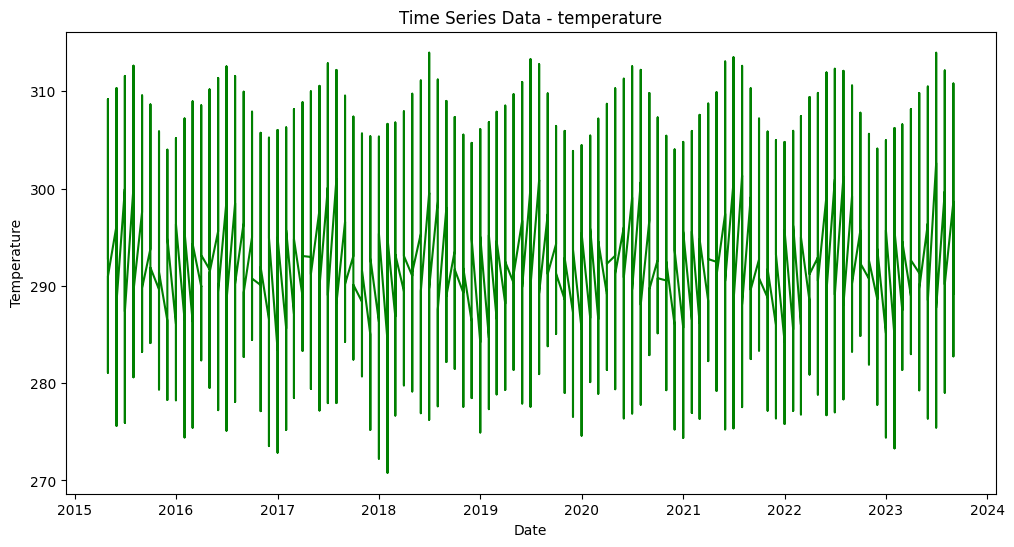

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['temperature_2m'], color = 'green')
plt.title('Time Series Data - temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()
# how to agregate this for yearly sums?

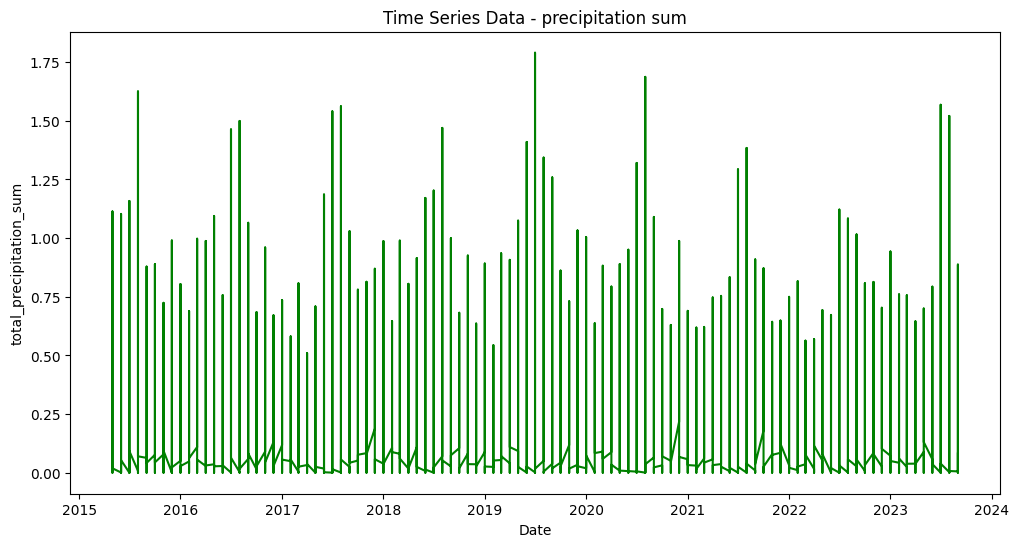

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['total_precipitation_sum'], color = 'green')
plt.title('Time Series Data - precipitation sum')
plt.xlabel('Date')
plt.ylabel('total_precipitation_sum')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['total_precipitation_sum'], color = 'green')
plt.title('Time Series Data - precipitation')
plt.xlabel('Date')
plt.ylabel('total_precipitation_sum')
plt.show()

In [ ]:
# make a map graph of average SPEI in Africa, Max SPEI, min SPEI, or SPEI variability